In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib notebook

import torch
import nibabel as nib
import nilearn as nil
import matplotlib.pyplot as plt
import os
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, './utils')
from utils.plot import ImagePlot

## Plotting ISLES 2018

In [207]:
path = '/datavol/brain_data/ISLES/2018/TRAINING/case_7/'

In [208]:
nii_paths = [] 
json_paths = [] 
for root,dirs, files in os.walk(path): 
    for f in files: 
        if '.nii' in f or '.nii.gz' in f: 
            nii_paths.append(os.path.join(root, f))
        elif '.json' in f: 
            json_paths.append(os.path.join(root, f))

In [209]:
nii_paths

['/datavol/brain_data/ISLES/2018/TRAINING/case_7/SMIR.Brain.XX.O.CT.345604/SMIR.Brain.XX.O.CT.345604.nii',
 '/datavol/brain_data/ISLES/2018/TRAINING/case_7/SMIR.Brain.XX.O.OT.345608/SMIR.Brain.XX.O.OT.345608.nii',
 '/datavol/brain_data/ISLES/2018/TRAINING/case_7/SMIR.Brain.XX.O.CT_4DPWI.345603/SMIR.Brain.XX.O.CT_4DPWI.345603.nii',
 '/datavol/brain_data/ISLES/2018/TRAINING/case_7/SMIR.Brain.XX.O.CT_CBV.345606/SMIR.Brain.XX.O.CT_CBV.345606.nii',
 '/datavol/brain_data/ISLES/2018/TRAINING/case_7/SMIR.Brain.XX.O.CT_Tmax.345609/SMIR.Brain.XX.O.CT_Tmax.345609.nii',
 '/datavol/brain_data/ISLES/2018/TRAINING/case_7/SMIR.Brain.XX.O.CT_CBF.345605/SMIR.Brain.XX.O.CT_CBF.345605.nii',
 '/datavol/brain_data/ISLES/2018/TRAINING/case_7/SMIR.Brain.XX.O.CT_MTT.345607/SMIR.Brain.XX.O.CT_MTT.345607.nii']

In [210]:
volumes = [(nib.load(nii).get_fdata().T, nii.strip('.nii').split('/')[-1]) for nii in nii_paths]

In [211]:
def show_data():
    for i in volumes:
        print(i[0].shape, i[1], end=' ')

In [212]:
show_data()

(8, 256, 256) SMIR.Brain.XX.O.CT.345604 (8, 256, 256) SMIR.Brain.XX.O.OT.345608 (49, 8, 256, 256) SMIR.Brain.XX.O.CT_4DPWI.345603 (8, 256, 256) SMIR.Brain.XX.O.CT_CBV.345606 (8, 256, 256) SMIR.Brain.XX.O.CT_Tmax.345609 (8, 256, 256) SMIR.Brain.XX.O.CT_CBF.345605 (8, 256, 256) SMIR.Brain.XX.O.CT_MTT.345607 

In [213]:
_4dvol = volumes.pop(2)

In [214]:
show_data()

(8, 256, 256) SMIR.Brain.XX.O.CT.345604 (8, 256, 256) SMIR.Brain.XX.O.OT.345608 (8, 256, 256) SMIR.Brain.XX.O.CT_CBV.345606 (8, 256, 256) SMIR.Brain.XX.O.CT_Tmax.345609 (8, 256, 256) SMIR.Brain.XX.O.CT_CBF.345605 (8, 256, 256) SMIR.Brain.XX.O.CT_MTT.345607 

In [215]:
titles

['VSD.Brain.XX.O.MR_TTP.127019',
 'VSD.Brain.XX.O.MR_ADC.128020',
 'VSD.Brain.XX.O.MR_rCBV.127017',
 'VSD.Brain.XX.O.MR_rCBF.127016',
 'VSD.Brain.XX.O.MR_Tmax.127018',
 'VSD.Brain.XX.O.OT.128050',
 'VSD.Brain.XX.O.MR_MTT.127014',
 'VSD.Brain.XX.O.MR_4DPWI.127015']

In [216]:
vol, titles = [v[0] for v in volumes], [v[1] for v in volumes]

In [224]:
_4dvol, title = _4dvol[0], _4dvol[1]


In [229]:
_4d = _4dvol.transpose(1,0,2,3)

In [232]:
volume = [] 
for img in range(_4d.shape[0]): 
    volume.append(_4d[img])
len(volume)

8

<IPython.core.display.Javascript object>


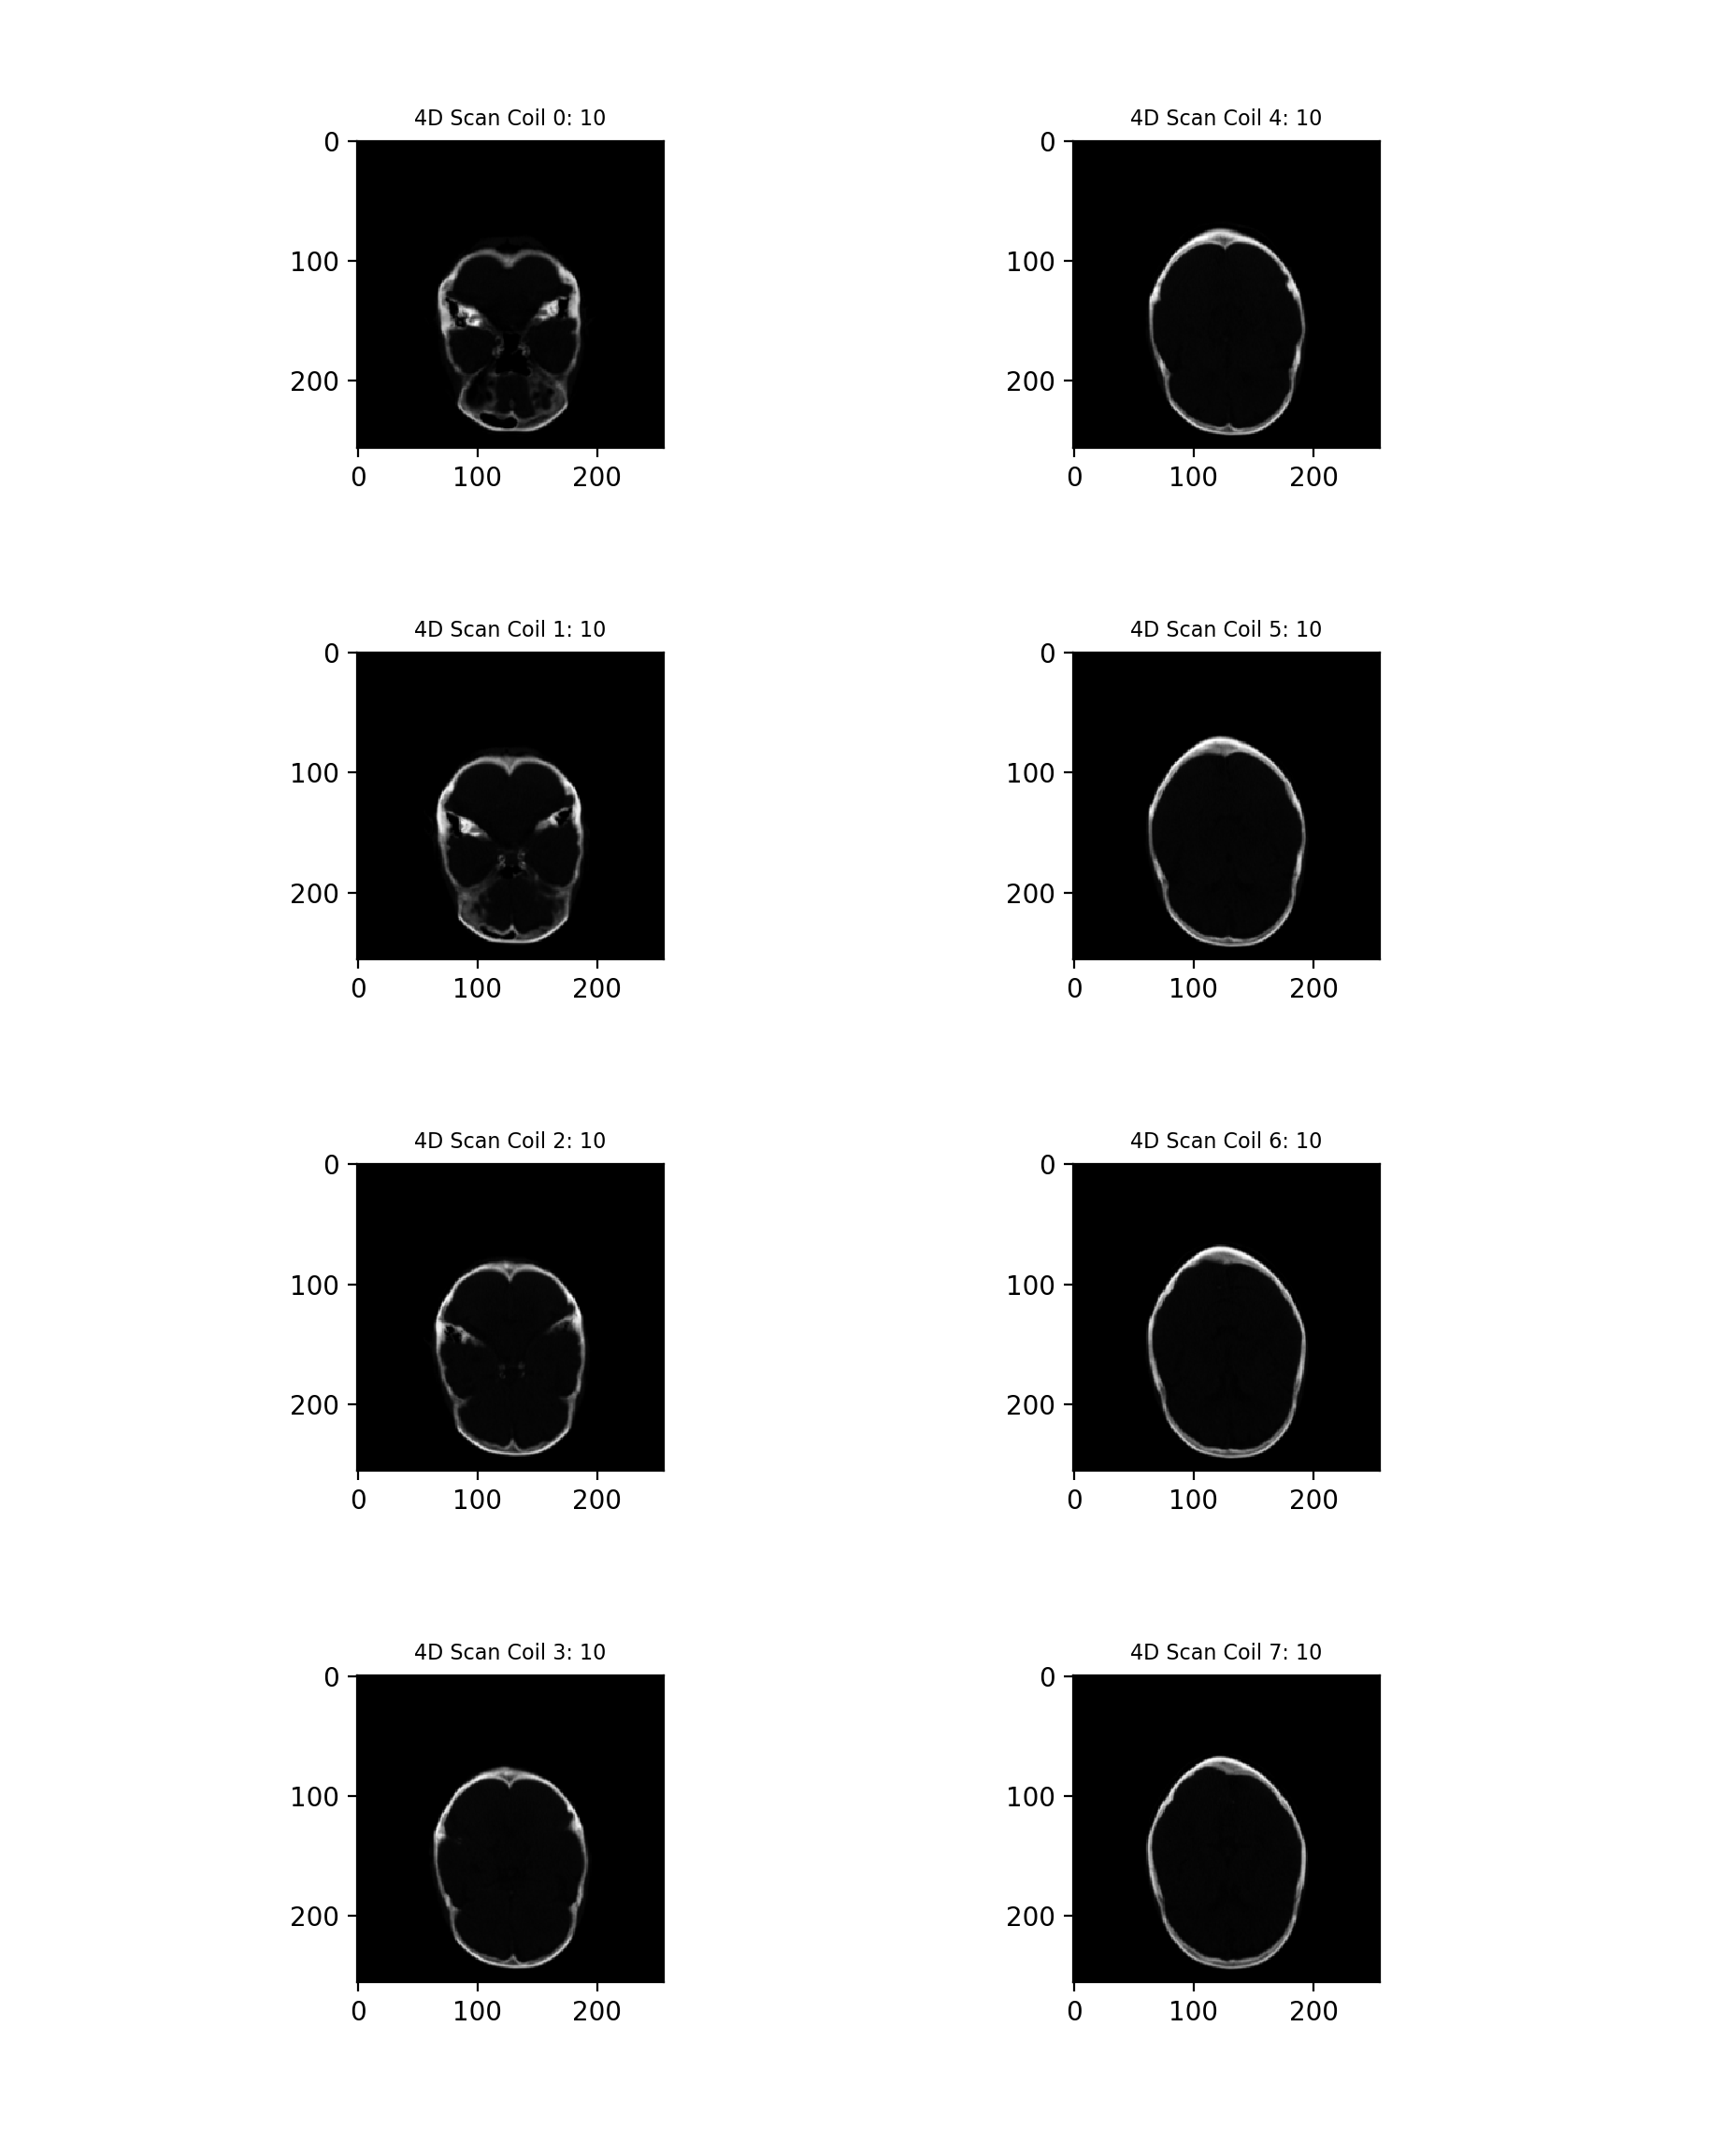

In [235]:
ip = ImagePlot(volume, titles=['4D Scan Coil %d' % i for i in range(8)], nrows=4)
ip.render()

<IPython.core.display.Javascript object>


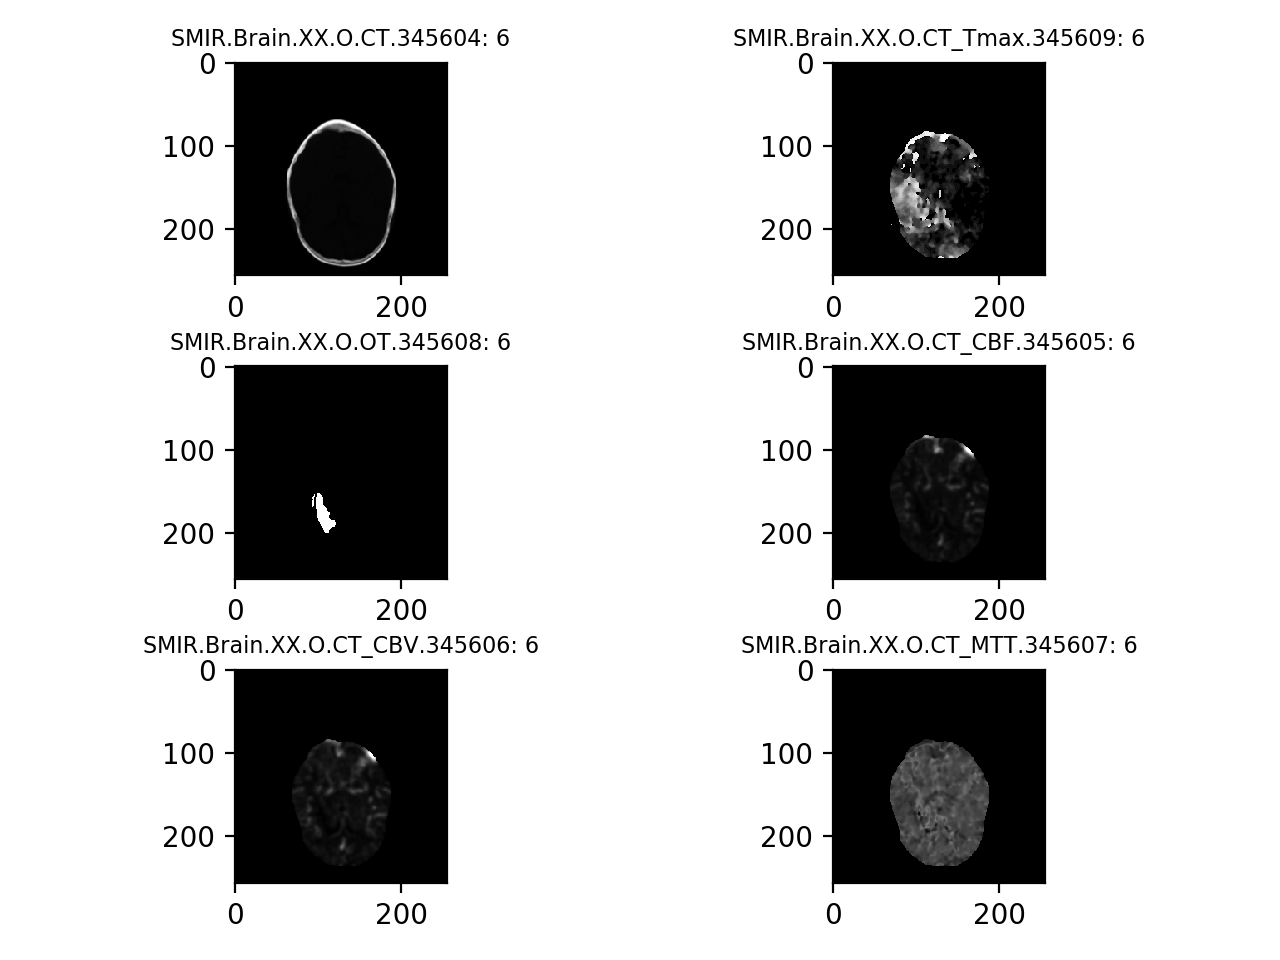

In [217]:
ip = ImagePlot(vol, titles, nrows=3)
ip.render()


In [42]:
import json

js_lst = []
for js in json_paths: 
    with open(js, 'r') as rf: 
        data = json.load(rf)
        js_lst.append(data)

In [43]:
js_lst[0]

{'rawImage': {'sliceThickness': None,
  'spaceBetweenSlices': None,
  'kilovoltPeak': None,
  'modality': {'id': 3,
   'name': 'CT',
   'description': 'Computed Tomography',
   'selfUrl': 'https://www.smir.ch/api/modalities/3'}},
 'subjectSnapshot': {'ageInDays': None,
  'heightInMeters': None,
  'weightInKilograms': None,
  'gender': {'id': 1,
   'name': 'O',
   'description': 'Other',
   'selfUrl': 'https://www.smir.ch/api/genders/1'},
  'dominance': {'id': 1,
   'name': 'NS',
   'description': 'Not Specified',
   'selfUrl': 'https://www.smir.ch/api/dominances/1'}},
 'id': 345604,
 'createdDate': '2018-07-03T15:01:58.8970000Z',
 'name': 'SMIR.Brain.XX.O.CT.345604.000.nii',
 'description': 'ISLES 2018 - TRAIN - Train_04_A - CT',
 'ontologyCount': 1,
 'type': {'name': 'RawImage',
  'displayName': 'Raw Image',
  'displayNameShort': 'RAW',
  'selfUrl': 'https://www.smir.ch/api/object_types/RawImage'},
 'downloadUrl': 'https://www.smir.ch/api/objects/345604/download',
 'license': {'selfUr

## Plotting ISLES 2017

In [247]:
path = '/datavol/brain_data/ISLES/2017/training_1/'


In [248]:
nii_paths = [] 
json_paths = [] 
for root,dirs, files in os.walk(path): 
    for f in files: 
        if '.nii' in f or '.nii.gz' in f: 
            nii_paths.append(os.path.join(root, f))
        elif '.json' in f: 
            json_paths.append(os.path.join(root, f))

In [249]:
volumes, titles = [], []
for nii in nii_paths:
    volumes.append(nib.load(nii).get_fdata().T)
    titles.append(nii.split('/')[-1].split('.nii')[0])

In [250]:
titles

['VSD.Brain.XX.O.MR_TTP.127019',
 'VSD.Brain.XX.O.MR_ADC.128020',
 'VSD.Brain.XX.O.MR_rCBV.127017',
 'VSD.Brain.XX.O.MR_rCBF.127016',
 'VSD.Brain.XX.O.MR_Tmax.127018',
 'VSD.Brain.XX.O.OT.128050',
 'VSD.Brain.XX.O.MR_MTT.127014',
 'VSD.Brain.XX.O.MR_4DPWI.127015']

In [251]:
for i in volumes:
    print(i.shape, end=' ')

(19, 192, 192) (19, 192, 192) (19, 192, 192) (19, 192, 192) (19, 192, 192) (19, 192, 192) (19, 192, 192) (80, 1, 19, 192, 192) 

In [252]:
_4dvol, title = volumes.pop(), titles.pop()

In [253]:
for i in volumes:
    print(i.shape, end=' ')

(19, 192, 192) (19, 192, 192) (19, 192, 192) (19, 192, 192) (19, 192, 192) (19, 192, 192) (19, 192, 192) 

In [257]:
_4dvol.shape

(80, 1, 19, 192, 192)

In [243]:
_4dvol = _4dvol.transpose(1,0,2,3)
_4d = []
_4d.append(_4dvol[0])
ip = ImagePlot(_4d, tiles=[title])
ip.render()

ValueError: axes don't match array

<IPython.core.display.Javascript object>


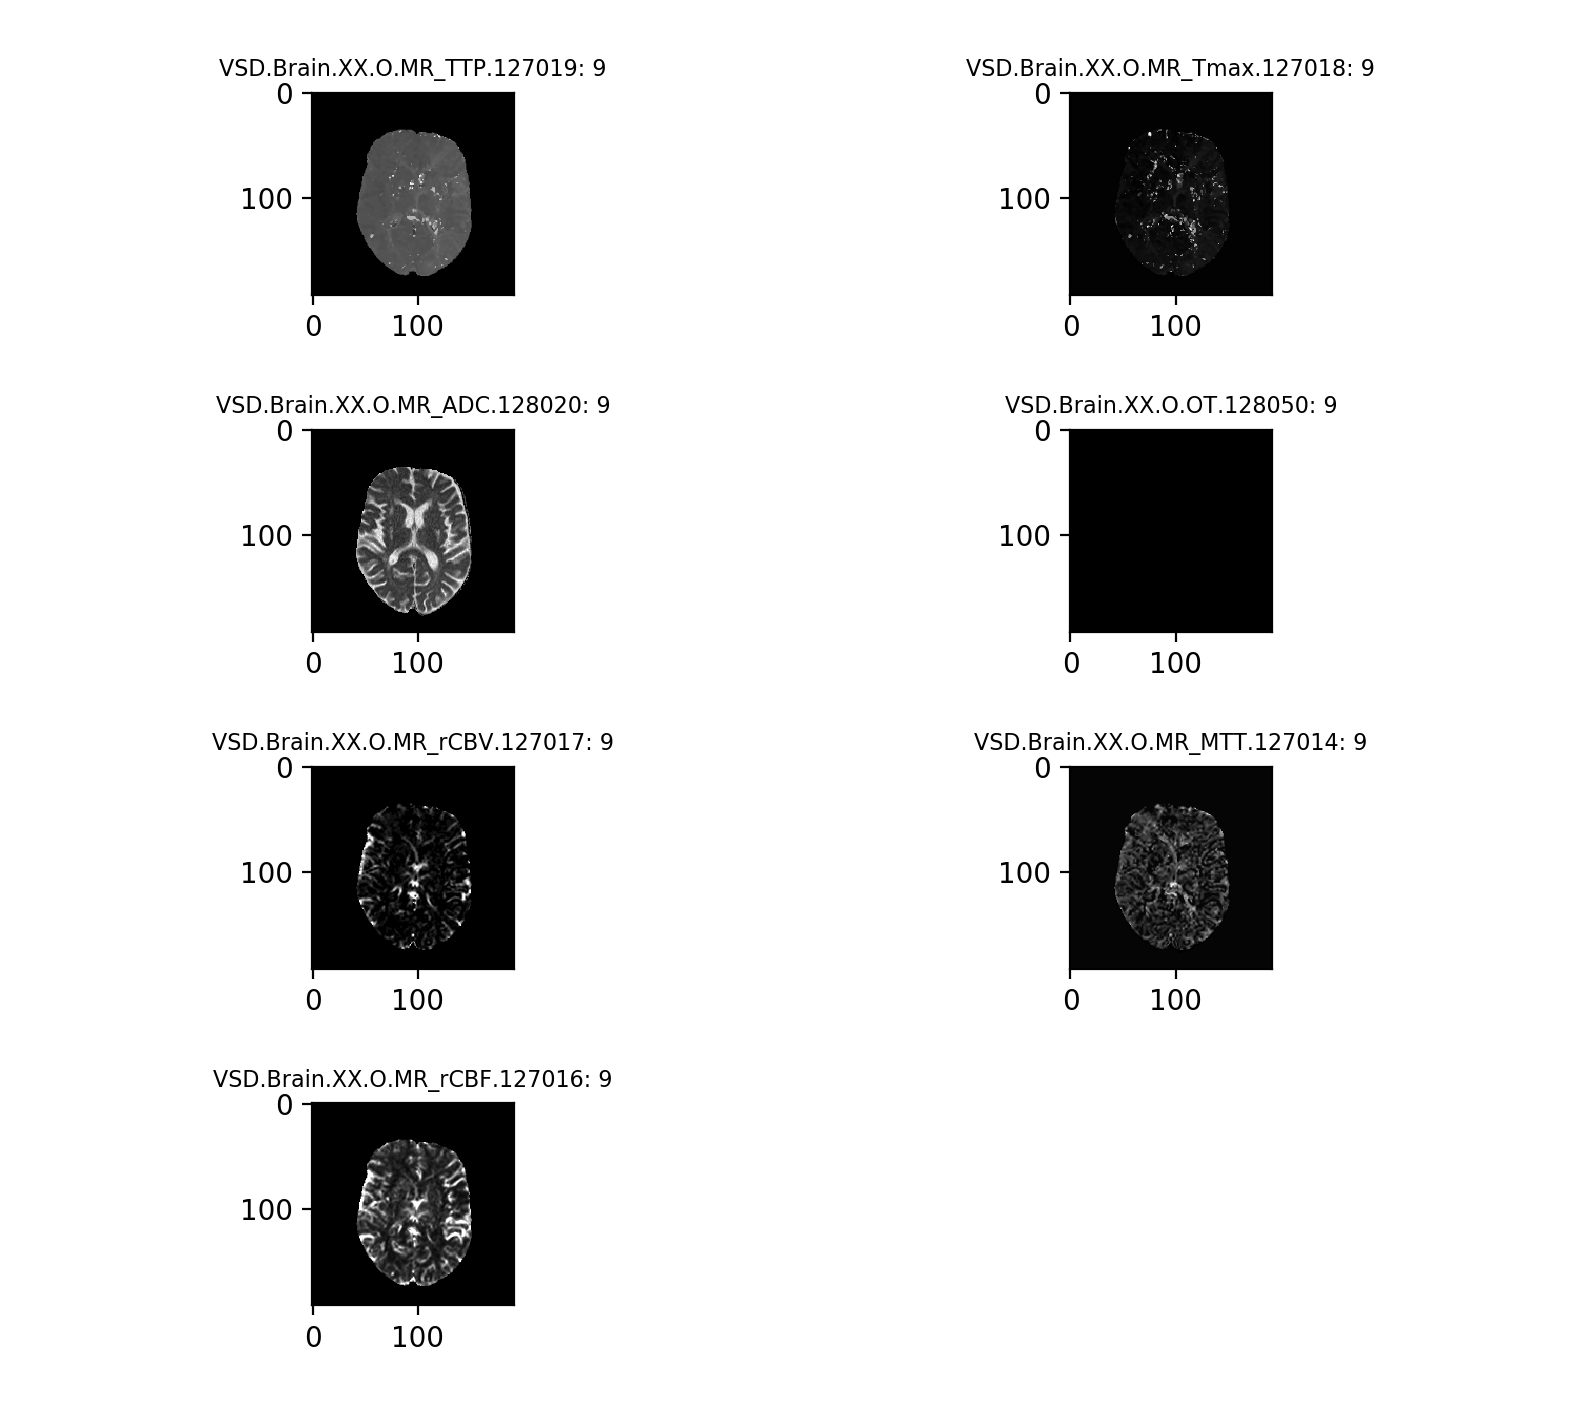

In [195]:
ip = ImagePlot(volumes, titles, nrows=4)
ip.render()

In [92]:
import json

js_lst = []
for js in json_paths: 
    with open(js, 'r') as rf: 
        data = json.load(rf)
        js_lst.append(data)

## Plotting ATLAS

In [258]:
path = '/datavol/brain_data/ATLAS_R1.1/Site1/031786/t01'
os.listdir(path)

['031786_LesionSmooth_stx.nii.gz', '031786_t1w_deface_stx.nii.gz']

In [259]:
nii_paths = [] 
json_paths = [] 
for root,dirs, files in os.walk(path): 
    for f in files: 
        if '.nii' in f or '.nii.gz' in f: 
            nii_paths.append(os.path.join(root, f))
        elif '.json' in f: 
            json_paths.append(os.path.join(root, f))

In [260]:
volumes, titles = [], []
for nii in nii_paths:
    volumes.append(nib.load(nii).get_fdata().T)
    titles.append(nii.split('/')[-1].split('.nii')[0])

In [261]:
for i in volumes:
    print(i.shape, end=' ')

(189, 233, 197) (189, 233, 197) 

In [262]:
for i in volumes:
    print(i.shape, end=' ')

(189, 233, 197) (189, 233, 197) 

<IPython.core.display.Javascript object>


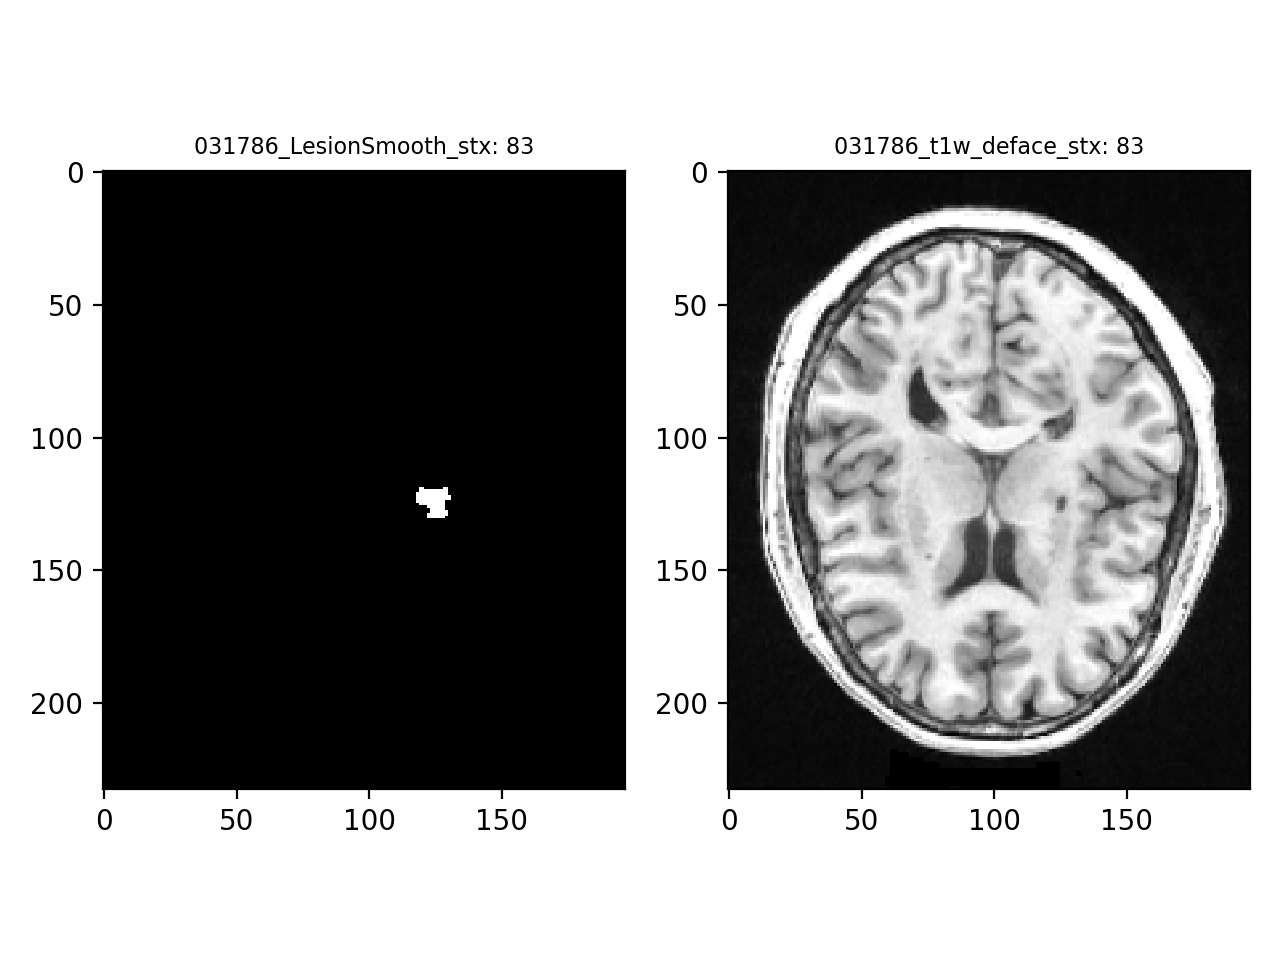

In [263]:
ip = ImagePlot(volumes, titles)
ip.render()